Keras

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, normalize
# Read data from csv
ws_data = pd.read_csv("data/Wheat Seeds.csv")
print(ws_data.head())

# Replace the species with 0, 1 or 2 as appropriate
ws_data['Class'].replace([1, 2, 3], [0, 1, 2], inplace=True)

# Get labels, flatten and encode to one-hot
labels = pd.DataFrame(ws_data, columns=['Class']).to_numpy()
labels = labels.flatten()
labels = to_categorical(labels)

# Get Features
columns = ['Area', 'Perimeter' ,'Compactness' , 'Length of Kernel', 'Width of Kernel', 'Asymmetry Coefficient', 'Length of Kernel Groove']
features = pd.DataFrame(ws_data, columns=columns).to_numpy()
features = normalize(features)

# Split data to training and test data, 2/3 for training and 1/3 for testing
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33)

Using TensorFlow backend.


   Id   Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0   1  15.26      14.84       0.8710             5.763            3.312   
1   2  14.88      14.57       0.8811             5.554            3.333   
2   3  14.29      14.09       0.9050             5.291            3.337   
3   4  13.84      13.94       0.8955             5.324            3.379   
4   5  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry Coefficient  Length of Kernel Groove  Class  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1  


Build a Keras Model

In [2]:
from keras.models import Sequential 
from keras.layers import Dense
from keras import optimizers

# Learning rate
learning_rate = 0.01

# Number of training epochs
num_epochs = 100

# Network architecture parameters
num_features = len(train_x[0])
num_classes = len(train_y[0])
num_hidden_nodes = 10

model = Sequential()
model.add(Dense(num_hidden_nodes, input_dim=num_features, activation='relu'))
model.add(Dense(num_hidden_nodes, activation='relu'))
model.add(Dense(num_hidden_nodes, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


Train the model

Instructions for updating:
Use tf.cast instead.
Train on 140 samples, validate on 70 samples
Epoch 1/100
140/140 [==============================] - 0s 2ms/step - loss: 1.1117 - acc: 0.3000 - val_loss: 1.0903 - val_acc: 0.4000
Epoch 2/100
140/140 [==============================] - 0s 64us/step - loss: 1.1073 - acc: 0.3000 - val_loss: 1.0915 - val_acc: 0.4000
Epoch 3/100
140/140 [==============================] - 0s 64us/step - loss: 1.1046 - acc: 0.3000 - val_loss: 1.0927 - val_acc: 0.4000
Epoch 4/100
140/140 [==============================] - 0s 57us/step - loss: 1.1022 - acc: 0.3000 - val_loss: 1.0941 - val_acc: 0.4000
Epoch 5/100
140/140 [==============================] - 0s 64us/step - loss: 1.1009 - acc: 0.3000 - val_loss: 1.0951 - val_acc: 0.4000
Epoch 6/100
140/140 [==============================] - 0s 64us/step - loss: 1.1000 - acc: 0.3000 - val_loss: 1.0960 - val_acc: 0.4000
Epoch 7/100
140/140 [==============================] - 0s 57us/step - loss: 1.0995 - acc: 0.3286 - val_l

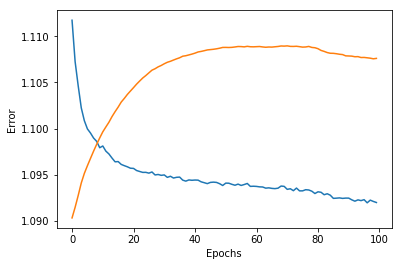

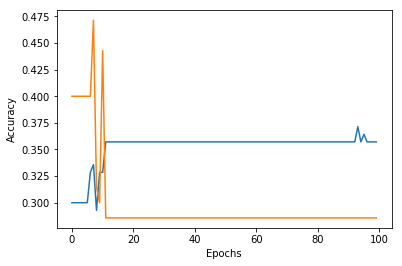

In [3]:
metrics = model.fit(train_x, train_y, validation_data=(test_x, test_y), batch_size=10, epochs=num_epochs, verbose=1)

# Plot the error chart
plt.plot(metrics.history['loss'])
plt.plot(metrics.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Plot the accuracy chart
plt.plot(metrics.history['acc'])
plt.plot(metrics.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

prediction=model.predict(test_x)
length=len(prediction)
y_label=np.argmax(test_y,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )
